In [1]:
import torch
import torch.nn as nn
import numpy as np
import numpy as np
import copy
import matplotlib.pyplot as plt
from torch import optim


class boxFilters(nn.Module):
    def __init__(self,a,b,c,d):
        super(boxFilters, self).__init__()
        self.alpha = nn.Parameter(torch.tensor(1.0),requires_grad=True)
        #self.a = nn.Parameter(torch.tensor(a))
        #self.b = nn.Parameter(torch.tensor(b))
        #self.c = nn.Parameter(torch.tensor(c))
        #self.d = nn.Parameter(torch.tensor(d))
        self.a = int(a)
        self.b = int(b)
        self.c = int(c)
        self.d = int(d)
        # self.a.requires_grad = False
        # self.b.requires_grad = False
        # self.c.requires_grad = False
        # self.d.requires_grad = False


    
    def setAlpha(self,alpha):
        self.alpha = nn.Parameter(torch.tensor(alpha),requires_grad=True)
    
    def setABCD(self,a,b,c,d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    
    def printParams(self):
        print("A:",self.a,"B:",self.b,"C:",self.c,"D:",self.d, "Alpha:", self.alpha)


In [22]:
    # def forward(self, integral_image):
        
    #     H, W = integral_image.shape[-2:]

    #     H = H - self.ogFilterSize + 1
    #     W = W - self.ogFilterSize + 1
    #     output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
    #     for box_filter in self.box_filters:
    #         a, b, c, d = int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)
    #         if b >= a and d >= c:  # Check if the box filter is valid
    #             # Compute the sum within the box filter for each position in the image

    #           if(self.reg):
    #             print("Regular Conv")  
    #             for i in range(H):
    #                 for j in range(W):
    #                     # Define the boundaries
                        
    #                     tlCol = j + a -1
    #                     tlRow = i + c -1

    #                     trCol = j + b
    #                     trRow = i + c -1


    #                     blCol = j + a -1
    #                     blRow = i + d

    #                     brCol = j + b
    #                     brRow = i + d

    #                     #print("tlCol:",tlCol,"tlRow:",tlRow,"trCol:",trCol,"trRow:",trRow,"blCol:",blCol,"blRow:",blRow,"brCol:",brCol,"brRow:",brRow)
    #                     # Get the sum within the boundaries and add it to the output

    #                     if(tlRow>=0 and tlCol>=0):
    #                         tlVal = integral_image[..., tlRow, tlCol]
    #                     else:
    #                         tlVal = 0
                        
    #                     if(trRow>=0 and trCol>=0):
    #                         trVal = integral_image[..., trRow, trCol]
    #                     else:
    #                         trVal = 0
                        
    #                     if(blRow>=0 and blCol>=0):
    #                         blVal = integral_image[..., blRow, blCol]
    #                     else:
    #                         blVal = 0
                        
    #                     if(brRow>=0 and brCol>=0):
    #                         brVal = integral_image[..., brRow, brCol]
    #                     else:
    #                         brVal = 0

                            
                        

    #                     #print(integral_image[..., tlRow, tlCol])
    #                     output[..., i, j] += brVal  + tlVal - trVal - blVal
    #           else:
    #                 print("SIMD Conv")

    #                 # Define the boundaries
    #                 row_indices = torch.arange(H).unsqueeze(-1).to(self.device)
    #                 col_indices = torch.arange(W).to(self.device)
    #                 print(row_indices.shape,col_indices.shape)
    #                 tlCol = col_indices + a - 1
    #                 tlRow = row_indices + c - 1

    #                 trCol = col_indices + b
    #                 trRow = tlRow  # trRow and tlRow are the same

    #                 blCol = tlCol  # blCol and tlCol are the same
    #                 blRow = row_indices + d

    #                 brCol = trCol  # brCol and trCol are the same
    #                 brRow = blRow  # brRow and blRow are the same

    #                 # Get the values at the boundaries
                    
    #                 tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
    #                 trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
    #                 blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
    #                 brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])

    #                 # Compute the output
    #                 output.add_(brVal + tlVal - trVal - blVal)  # in-place addition

                        
            
    #             #print(f"Invalid box filter: a={a}, b={b}, c={c}, d={d}")
    #     return output



    # def forward(self, integral_image):
        
    #     H, W = integral_image.shape[-2:]

    #     H = H - self.ogFilterSize + 1
    #     W = W - self.ogFilterSize + 1
    #     #output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
    #     # Define the boundaries
    #     row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).to(self.device)  # shape: (H, 1, 1)
    #     col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).to(self.device)  # shape: (1, W, 1)
    #    # print(row_indices.shape,col_indices.shape)
    #     # a, b, c, d should be 1D tensors of shape (num_filters,)
    #     # reshape them to (1, 1, num_filters)

    #     #box_filters_tensor = torch.tensor([[int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)] for box_filter in self.box_filters]).to(self.device)
    #     box_filters_tensor = torch.tensor([[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in self.box_filters]).to(self.device)
        
        

    #     a, b, c, d = box_filters_tensor[:, 0], box_filters_tensor[:, 1], box_filters_tensor[:, 2], box_filters_tensor[:, 3]
        
    #     a, b, c, d = a.unsqueeze(0).unsqueeze(0), b.unsqueeze(0).unsqueeze(0), c.unsqueeze(0).unsqueeze(0), d.unsqueeze(0).unsqueeze(0)
        
    #     #box_filters_alpha = torch.tensor([[box_filter.alpha] for box_filter in self.box_filters]).to(self.device)
    #     box_filters_alpha = torch.stack([box_filter.alpha for box_filter in self.box_filters]).to(self.device)
    #     #print("Alpha Check:",box_filters_alpha,box_filters_alpha1)
    #     #print("dtype",box_filters_alpha.dtype)
    #     #print("CA Shape:",col_indices.shape,a.shape)
    #     tlCol = col_indices + a - 1  # broadcasting happens here
    #     tlRow = row_indices + c - 1

    #     trCol = col_indices + b
    #     trRow = tlRow  # trRow and tlRow are the same

    #     blCol = tlCol  # blCol and tlCol are the same
    #     blRow = row_indices + d

    #     brCol = trCol  # brCol and trCol are the same
    #     brRow = blRow  # brRow and blRow are the same
    #     #print(tlCol.shape,tlRow.shape,trCol.shape,trRow.shape,blCol.shape,blRow.shape,brCol.shape,brRow.shape)
    #     # Get the values at the boundaries
    #     tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
    #     trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
    #     blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
    #     brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])
    #     #print(brVal.shape,tlVal.shape,trVal.shape,blVal.shape)
    #     # Compute the output
    #     output = brVal + tlVal - trVal - blVal  # in-place addition
    #     #output = output*self.box_filters[0].alpha
    #     #print(output.shape,box_filters_alpha.shape)
    #     #print("1:",output)
    #     output = output.permute(0, 1, 4, 2, 3)
    #     #print("out:",output.shape[2])
    #     #box_filters_alpha = box_filters_alpha.view(1, 1, output.shape[2], 1, 1)
    #     box_filters_alpha = box_filters_alpha.view(1, 1, -1, 1, 1)
    #     output = output * box_filters_alpha
    #     output = output.sum(dim=2)
    #     #print("2:",output)
    #     return output
        

In [62]:
class BoxFilterConvolution(nn.Module):
    def __init__(self, box_filters, ogFilterSize,reg,device):
        super(BoxFilterConvolution, self).__init__()
        self.box_filters = box_filters
        self.ogFilterSize = ogFilterSize
        self.reg = reg
        self.device = device 
 
    def forward(self, integral_image):
        
        H, W = integral_image.shape[-2:]

        H = H - self.ogFilterSize + 1
        W = W - self.ogFilterSize + 1
        #output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
        # Define the boundaries
        row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).to(self.device)  # shape: (H, 1, 1)
        col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).to(self.device)  # shape: (1, W, 1)
       # print(row_indices.shape,col_indices.shape)
        # a, b, c, d should be 1D tensors of shape (num_filters,)
        # reshape them to (1, 1, num_filters)

        #box_filters_tensor = torch.tensor([[int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)] for box_filter in self.box_filters]).to(self.device)
        box_filters_tensor = torch.tensor([[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in self.box_filters]).to(self.device)
        
        

        a, b, c, d = box_filters_tensor[:, 0], box_filters_tensor[:, 1], box_filters_tensor[:, 2], box_filters_tensor[:, 3]
        
        a, b, c, d = a.unsqueeze(0).unsqueeze(0), b.unsqueeze(0).unsqueeze(0), c.unsqueeze(0).unsqueeze(0), d.unsqueeze(0).unsqueeze(0)
        
        #box_filters_alpha = torch.tensor([[box_filter.alpha] for box_filter in self.box_filters]).to(self.device)
        box_filters_alpha = torch.stack([box_filter.alpha for box_filter in self.box_filters]).to(self.device)
        #print("Alpha Check:",box_filters_alpha,box_filters_alpha1)
        #print("dtype",box_filters_alpha.dtype)
        #print("CA Shape:",col_indices.shape,a.shape)
        tlCol = col_indices + a - 1  # broadcasting happens here
        tlRow = row_indices + c - 1

        trCol = col_indices + b
        trRow = tlRow  # trRow and tlRow are the same

        blCol = tlCol  # blCol and tlCol are the same
        blRow = row_indices + d

        brCol = trCol  # brCol and trCol are the same
        brRow = blRow  # brRow and blRow are the same
        #print(tlCol.shape,tlRow.shape,trCol.shape,trRow.shape,blCol.shape,blRow.shape,brCol.shape,brRow.shape)
        # Get the values at the boundaries
        tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
        trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
        blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
        brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])
        #print(brVal.shape,tlVal.shape,trVal.shape,blVal.shape)
        # Compute the output
        output = brVal + tlVal - trVal - blVal  # in-place addition
        #output = output*self.box_filters[0].alpha
        #print(output.shape,box_filters_alpha.shape)
        #print("1:",output)
        output = output.permute(0, 1, 4, 2, 3)
        #print("out:",output.shape[2])
        #box_filters_alpha = box_filters_alpha.view(1, 1, output.shape[2], 1, 1)
        box_filters_alpha = box_filters_alpha.view(1, 1, -1, 1, 1)
        output = output * box_filters_alpha
        output = output.sum(dim=2)
        #print("2:",output)
        return output


# CNN Network with box filters
class cnnBox(nn.Module):

    def __init__(self, nBoxes, nChannels, reg,device,box_filters,ogFilterSize):
        super(cnnBox, self).__init__()
        self.boxes = nBoxes
        self.nChannels = nChannels
        
        #self.boxes = nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)])
        #n = 5  # replace with the desired number of module lists
        self.boxes = nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)])
        for i in range(0,nBoxes):

            self.boxes[i].setABCD(box_filters[i][0],box_filters[i][1],box_filters[i][2],box_filters[i][3])
        
        self.conv = BoxFilterConvolution(self.boxes,ogFilterSize,reg,device)
        #self.fc = nn.Linear(576,128)
         

    def forward(self,x):
        #print(x.shape)
        x0 = x[:,0,:,:].cumsum(dim=-2).cumsum(dim=-1)
        #print(x0.shape)
        x0 = x0.unsqueeze(1)
        x0 = self.conv(x0)

        x1 = x[:,1,:,:].cumsum(dim=-2).cumsum(dim=-1)
        x1 = x1.unsqueeze(1)
        x1 = self.conv(x1)

        
        x2 = x[:,2,:,:].cumsum(dim=-2).cumsum(dim=-1)
        x2 = x2.unsqueeze(1)
        x2 = self.conv(x2)
        # #print(x0.shape,x1.shape,x2.shape)
        x = torch.stack([x0,x1,x2],dim=1)
        x = x.sum(dim=1)
        #print(x.shape)
        #x = x.to(torch.float)
        #x = nn.Flatten()(x)
        #x = self.fc(x)
        return x
        

In [24]:
# boxFiltersList = [[0,1,0,1],[0,1,0,1],[0,2,2,2]]
# cBox = cnnBox(3,1,False,device,boxFiltersList,3)
# cBox.boxes[1].setAlpha(2.0)

# optimizer = torch.optim.Adam(cBox.parameters(),lr=0.001)


# cBox = cBox.to(device)


# a = a.to(device)

# x=cBox(a)

In [25]:
# class BoxFilterConvolution(nn.Module):
#     def __init__(self, box_filters, ogFilterShape,reg,device):
#         super(BoxFilterConvolution, self).__init__()
#         self.box_filters = box_filters
#         self.ogFilterShape = ogFilterShape
#         self.reg = reg
#         self.device = device



#     def forward(self, integral_image):
        
#         H, W = integral_image.shape[-2:]

#         H = H - self.ogFilterShape[0] + 1
#         W = W - self.ogFilterShape[1] + 1
#         C = self.ogFilterShape[2]
#         #print(C)
#         #output = torch.zeros((integral_image.shape[0],integral_image.shape[1],H,W)).to(self.device)
#         # Define the boundaries
#         #row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).to(self.device)  # shape: (H, 1, 1)
#         #col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).to(self.device)  # shape: (1, W, 1)
#         row_indices = torch.arange(H).unsqueeze(-1).unsqueeze(-1).unsqueeze(0).expand(C, H, 1, 1).to(self.device)  # shape: (C, H, 1, 1)
#         col_indices = torch.arange(W).unsqueeze(-1).unsqueeze(0).unsqueeze(0).expand(C, 1, W, 1).to(self.device)  # shape: (C, 1, W, 1)
#         #print(row_indices)
#        # print(row_indices.shape,col_indices.shape)
#         # a, b, c, d should be 1D tensors of shape (num_filters,)
#         # reshape them to (1, 1, num_filters)

#         #box_filters_tensor = torch.tensor([[int(box_filter.a), int(box_filter.b), int(box_filter.c), int(box_filter.d)] for box_filter in self.box_filters]).to(self.device)
#         #box_filters_tensor = torch.tensor([[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in self.box_filters]).to(self.device)
        
#         box_filters_tensor = torch.tensor([[[box_filter.a, box_filter.b, box_filter.c, box_filter.d] for box_filter in sublist] for sublist in self.box_filters]).to(self.device)
#         #print(box_filters_tensor.shape,box_filters_tensor,box_filters_tensor[:,:,0])
#         a, b, c, d = box_filters_tensor[:,:, 0], box_filters_tensor[:,:, 1], box_filters_tensor[:,:, 2], box_filters_tensor[:,:, 3]
        
       
#         a, b, c, d = a.unsqueeze(1).unsqueeze(1), b.unsqueeze(1).unsqueeze(1), c.unsqueeze(1).unsqueeze(1), d.unsqueeze(1).unsqueeze(1)
#         #print(row_indices.shape,a.shape)
#         #return
#         #print(a,a.shape)
#         #return
#         #box_filters_alpha = torch.tensor([[box_filter.alpha] for box_filter in self.box_filters]).to(self.device)
#         #box_filters_alpha = torch.stack([box_filter.alpha for box_filter in self.box_filters]).to(self.device)
#         box_filters_alpha = torch.stack([torch.stack([box_filter.alpha for box_filter in sublist]) for sublist in self.box_filters]).to(self.device)
#         #print("Alpha Check:",box_filters_alpha,box_filters_alpha.shape)
#         #print(col_indices.shape,a.shape)
#         #return
#         #print("dtype",box_filters_alpha.dtype)
#         #print("CA Shape:",col_indices.shape,a.shape)
#         tlCol = col_indices + a - 1  # broadcasting happens here
#         tlRow = row_indices + c - 1

#         trCol = col_indices + b
#         trRow = tlRow  # trRow and tlRow are the same

#         blCol = tlCol  # blCol and tlCol are the same
#         blRow = row_indices + d

#         brCol = trCol  # brCol and trCol are the same
#         brRow = blRow  # brRow and blRow are the same
#         #print(tlCol.shape,tlRow.shape,trCol.shape,trRow.shape,blCol.shape,blRow.shape,brCol.shape,brRow.shape)
#         # Get the values at the boundaries
#         tlVal = torch.where((tlRow < 0) | (tlCol < 0), 0, integral_image[..., tlRow, tlCol])
#         trVal = torch.where((trRow < 0) | (trCol < 0), 0, integral_image[..., trRow, trCol])
#         blVal = torch.where((blRow < 0) | (blCol < 0), 0, integral_image[..., blRow, blCol])
#         brVal = torch.where((brRow < 0) | (brCol < 0), 0, integral_image[..., brRow, brCol])
#         #print(brVal.shape,tlVal.shape,trVal.shape,blVal.shape)
#         # Compute the output
#         output = brVal + tlVal - trVal - blVal  # in-place addition
#         #output = output*self.box_filters[0].alpha
#         #print(output.shape,box_filters_alpha.shape)
#         #print("1:",output)
        
#         # while len(output.shape) > 5:
#         #     print(output.shape)
#         #     output = output.squeeze(0)
#         #print("output:",output.shape)
#         output = output.squeeze(1)
#         output = output.permute(0, 1, 4, 2, 3)
#         #print(output)
#         #print("out:",output.shape[2])
#         #box_filters_alpha = box_filters_alpha.view(1, 1, output.shape[2], 1, 1)
#         #print(box_filters_alpha.shape)
#         box_filters_alpha = box_filters_alpha.view(1, box_filters_alpha.shape[0], box_filters_alpha.shape[1], 1, 1)
#         output = output * box_filters_alpha
#         output = output.sum(dim=2)
#         #print(output)
#         #print("2:",output)
#         return output
        



# # CNN Network with box filters
# class cnnBox(nn.Module):

#     def __init__(self, nBoxes, reg,device,box_filters,ogFilterSize):
#         super(cnnBox, self).__init__()
#         self.oxes = nBoxes
#         self.nChannels = ogFilterSize[2]
        
#         #self.boxes = nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)])
#         #n = 5  # replace with the desired number of module lists
#         self.boxes = [nn.ModuleList([boxFilters(0,1,0,1) for _ in range(self.boxes)]) for _ in range(self.nChannels)]
#         for i in range(0,self.nChannels):
#          for j in range(0,nBoxes):
#             self.boxes[i][j].setABCD(box_filters[i][j][0],box_filters[i][j][1],box_filters[i][j][2],box_filters[i][j][3])
        
#         self.conv = BoxFilterConvolution(self.boxes,ogFilterSize,reg,device)
#         for i,j in self.conv.named_parameters():
#             print(i,j)
#         self.fc = nn.Linear(1728,128)
            

#     # def forward(self,x):
#     #     x = x.cumsum(dim=-2).cumsum(dim=-1)
#     #     x = self.conv(x)
#     #     x = x.to(torch.float)
#     #     x = nn.Flatten()(x)
#     #     x = self.fc(x)
#     #     return x
    
#     def forward(self, x):
#         x = x.cumsum(dim=-2).cumsum(dim=-1)
#         return self.conv(x)

In [63]:
device = "cuda:0"

In [27]:
# boxFiltersList = [[[0,2,0,2],[0,1,0,1],[0,2,2,2]]]
# cBox = cnnBox(3,False,device,boxFiltersList,(3,3,2))

In [5]:
def computeTempFilter(tempBoxFilterList):
    tempFilter = np.zeros((3,3))
    for i in range(0,len(tempBoxFilterList)):
        for j in range(tempBoxFilterList[i].c,tempBoxFilterList[i].d+1):
            for k in range(tempBoxFilterList[i].a,tempBoxFilterList[i].b+1):
                #print(j,k)
                tempFilter[j][k] = tempFilter[j][k] + tempBoxFilterList[i].alpha

    return tempFilter

In [116]:
def get_all_box_coordinates(kernel_size):
    coordinates = []
    for a in range(kernel_size):
        for b in range(a, kernel_size):
            for c in range(kernel_size):
                for d in range(c, kernel_size):
                    coordinates.append([a, b, c, d])
                    
    return coordinates

In [119]:
all_boxes = get_all_box_coordinates(11)

In [120]:
print(len(all_boxes))

4356


In [33]:
# lossFunc = nn.CrossEntropyLoss()

# boxFiltersList = [[[0,1,0,1],[0,2,0,2],[0,3,0,3],[0,4,0,4],[1,3,1,3],[1,4,1,4],[2,4,2,4],[3,4,3,4],[0,4,0,0],[0,0,0,4],[2,2,0,4],[0,4,2,2]],
#                  [[0,1,0,2],[0,2,0,3],[0,3,0,4],[0,4,0,1],[1,3,1,4],[1,4,1,0],[2,4,2,1],[3,4,3,2],[0,4,0,3],[0,0,0,2],[2,2,0,3],[0,4,2,1]],
#                   [[0,1,0,3],[0,2,0,4],[0,3,0,1],[0,4,0,2],[1,3,1,0],[1,4,1,2],[2,4,2,3],[3,4,3,0],[0,4,0,1],[0,0,0,3],[2,2,0,1],[0,4,2,3]]]

# cBox = cnnBox(12,False,device,boxFiltersList,(5,5,3))

# device = "cuda:0" if torch.cuda.is_available() else "cpu"

# cBox.to(device)
# optimizer = optim.SGD(cBox.parameters(), lr=0.01)

# # Train the network
# for epoch in range(20):  # 10 epochs
#     totalLoss = 0
#     for images, labels in trainloader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()
#         output = cBox(images)
        
#         loss = nn.CrossEntropyLoss()(output, labels)
#         loss.backward()
#         optimizer.step()
#         totalLoss = totalLoss + loss.item()
    
#     print(f"Epoch {epoch+1} completed",totalLoss)

In [34]:
input_images = torch.load("./input_images.pt")
feature_maps = torch.load("./feature_maps.pt").permute(1, 0, 2, 3)

In [35]:
input_images.shape

torch.Size([1000, 1, 28, 28])

In [121]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define a custom Dataset class
class TensorDataset(Dataset):
    def __init__(self, feature_map, input_image):
        self.feature_map = feature_map
        self.input_image = input_image

    def __len__(self):
        return self.feature_map.size(0)

    def __getitem__(self, idx):
        return self.feature_map[idx], self.input_image[idx]

In [122]:
featureMap = feature_maps.detach()
inputs = input_images.detach()

In [123]:
# Create an instance of the custom dataset
dataset = TensorDataset(featureMap[:,0,:,:].unsqueeze(1), inputs)

dataloader = DataLoader(dataset, batch_size=32)

In [124]:
boxFiltersList = get_all_box_coordinates(11)
model = cnnBox(len(boxFiltersList),1,False,device, boxFiltersList,11)
#print(len(boxFiltersList),len(boxFiltersList[0]),len(boxFiltersList[0][0]))
#return
EPOCHS = 10
LAMBDA = 0.0001
optimizer = optim.AdamW(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

for epoch in range(EPOCHS):
    for batch in dataloader:
        ft_maps, inp_imgs = batch
        
        box_model_op = model(inp_imgs)
        
        #print("inp:",inp_imgs.shape,ft_maps.shape,box_model_op.shape)
        loss = criterion(box_model_op, ft_maps)

        l1_penalty = sum(torch.abs(param).sum() for param in model.parameters())
        loss += LAMBDA * l1_penalty
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} completed with loss: {loss}")

Epoch 1 completed with loss: 7.691158294677734
Epoch 2 completed with loss: 0.9019960761070251
Epoch 3 completed with loss: 0.5227681398391724
Epoch 4 completed with loss: 0.485098272562027
Epoch 5 completed with loss: 0.476893812417984
Epoch 6 completed with loss: 0.4731825292110443
Epoch 7 completed with loss: 0.466644823551178
Epoch 8 completed with loss: 0.48192280530929565
Epoch 9 completed with loss: 0.458503782749176
Epoch 10 completed with loss: 0.46594440937042236


In [125]:
len(boxFiltersList)

4356

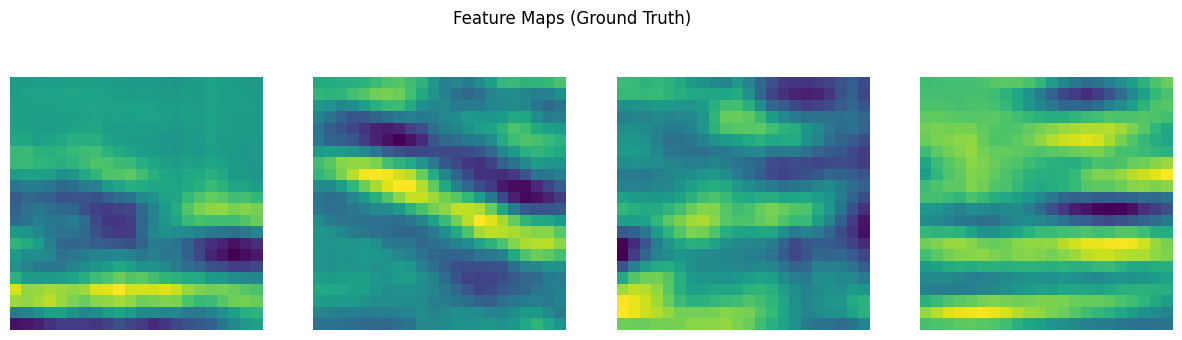

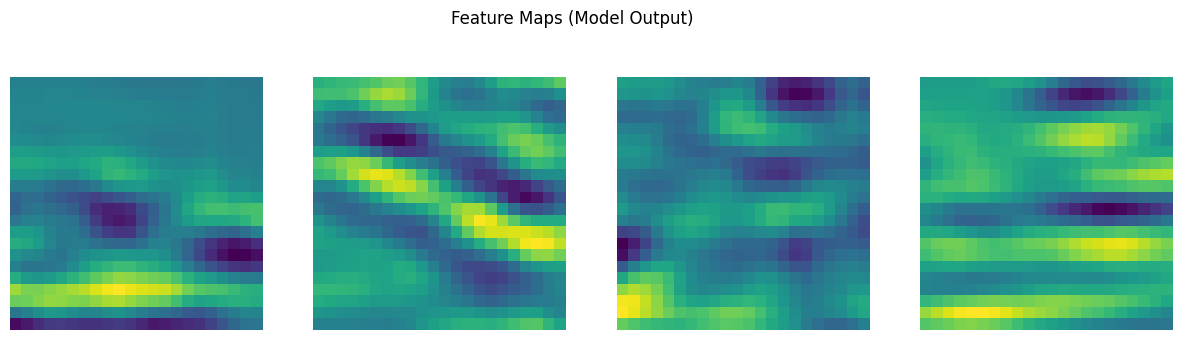

In [126]:
example_batch = next(iter(dataloader))
example_ft_maps, example_inp_imgs = example_batch

def plot_feature_maps(feature_maps, title):
    num_feature_maps = feature_maps[:4].shape[0]
    fig, axes = plt.subplots(1, num_feature_maps, figsize=(15, 4))
    for i in range(num_feature_maps):
        axes[i].imshow(feature_maps[i, 0].detach().cpu().numpy())
        axes[i].axis('off')
    fig.suptitle(title)
    plt.show()

# Plot the example input image
# plt.figure(figsize=(5, 5))
# plt.imshow(example_inp_imgs[0].detach().cpu().numpy().transpose(1, 2, 0), cmap='gray')
# plt.title('Input Image')
# plt.axis('off')
# plt.show()

# Plot the example feature maps
example_output = model(example_inp_imgs)
plot_feature_maps(example_ft_maps, 'Feature Maps (Ground Truth)')
plot_feature_maps(example_output, 'Feature Maps (Model Output)')

In [97]:
count = 0

for i,j in model.named_parameters():
    if(abs(j.item())<0.0001):
       count = count + 1
print(count)

1533


In [98]:
for name, param in model.named_parameters():
    param.data = torch.where(torch.abs(param.data) < 0.0001, torch.zeros_like(param.data), param.data)

In [ ]:
totalLoss=0
for batch in dataloader:
        ft_maps, inp_imgs = batch
        
        box_model_op = model(inp_imgs)
        print(criterion(box_model_op, ft_maps))
        #print("inp:",inp_imgs.shape,ft_maps.shape,box_model_op.shape)
        #totalLoss = totalLoss + criterion(box_model_op, ft_maps)

In [88]:
def computeTempFilter(tempBoxFilterList):
    tempFilter = np.zeros((11,11))
    for i in range(0,len(tempBoxFilterList)):
        for j in range(tempBoxFilterList[i].c,tempBoxFilterList[i].d+1):
            for k in range(tempBoxFilterList[i].a,tempBoxFilterList[i].b+1):
                #print(j,k)
                tempFilter[j][k] = tempFilter[j][k] + tempBoxFilterList[i].alpha

    return tempFilter

In [89]:
# original_filter = torch.tensor([[-0.0225,  0.2035,  0.0672,  0.1836, -0.2526],
#         [-0.1349,  0.1441,  0.0781,  0.0347, -0.3479],
#         [-0.0598,  0.1090,  0.0902, -0.1602, -0.0176],
#         [-0.0561,  0.1678,  0.0149, -0.0683,  0.0802],
#         [-0.0414,  0.1663,  0.0753,  0.3775,  0.0611]])
temp_filter = computeTempFilter(model.boxes)

In [115]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
example_batch = next(iter(dataloader))
example_ft_maps, example_inp_imgs = example_batch

example_inp_imgs = example_inp_imgs.to(device)

def plot_feature_maps(feature_maps, title):
    num_feature_maps = feature_maps[:4].shape[0]
    fig, axes = plt.subplots(1, num_feature_maps, figsize=(15, 4))
    for i in range(num_feature_maps):
        axes[i].imshow(feature_maps[i, 0].detach().cpu().numpy())
        axes[i].axis('off')
    fig.suptitle(title)
    plt.show()

# Plot the example input image
# plt.figure(figsize=(5, 5))
# plt.imshow(example_inp_imgs[0].detach().cpu().numpy().transpose(1, 2, 0), cmap='gray')
# plt.title('Input Image')
# plt.axis('off')
# plt.show()

# Plot the example feature maps
example_output = model(example_inp_imgs)
plot_feature_maps(example_ft_maps, 'Feature Maps (Ground Truth)')
plot_feature_maps(example_output, 'Feature Maps (Model Output)')

In [125]:
torch.nn.L1Loss()(torch.tensor(temp_filter), original_filter)

tensor(0.1033, dtype=torch.float64)

In [77]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Download and load the training data
trainset = datasets.CIFAR10('~/.pytorch/CIFAR/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.CIFAR10('~/.pytorch/CIFAR/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 3, 11)  # 1 input channel, 6 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(3, 3, 11)
        self.fc = nn.Linear(432, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        #x = x.view(-1, 36864)  # Flatten the tensor
        #print(x.shape)
        x = x.flatten(1)  # Flatten the tensor
        x = self.fc(x)
        return x



# Initialize the network and optimizer
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = Net()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the network
for epoch in range(10):  # 10 epochs
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = nn.CrossEntropyLoss()(output, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed")

In [79]:


# Switch model to evaluation mode
model.eval()

correct = 0
total = 0

# Disable gradient computation
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 37 %


In [80]:
input = None
for images, labels in testloader:
    if(input==None):
        input = images
    else:
        input = torch.cat((input,images),0)

input=input.to(device)
featureMap = model.conv1(input)

In [81]:
inputs = input

In [41]:
featureMap.shape

torch.Size([10000, 3, 28, 28])

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()
count = 0
weight = None
for i,j in model.named_parameters():
  if(count>0):
    break
  print(i)
  weight = j
  count = count + 1
weight[0]